## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


We previously used this dataset for KNN regression. Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not useful to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [5]:
#answer below:
data = absent.drop(['Body mass index', 'ID', 'Disciplinary failure'], axis=1)
data = pd.get_dummies(data, columns=['Reason for absence', 'Education', 'Seasons', 'Day of the week'], drop_first=True)

melted = data.corr().melt()

melted['value'] = abs(melted['value'])
melted = melted[melted['value'] != 1]
print(melted.sort_values(by='value', ascending=False))

X = data.drop('Absenteeism time in hours', axis=1)
y = data['Absenteeism time in hours']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

                             variable     value
46                   Month of absence  0.749246
2346                        Seasons_4  0.749246
207                               Age  0.670979
157                      Service time  0.670979
2244                        Seasons_2  0.657408
...                               ...       ...
1071             Reason for absence_8  0.000237
2253                        Seasons_2  0.000128
503                     Social smoker  0.000128
1277            Reason for absence_12  0.000043
127   Distance from Residence to Work  0.000043

[2550 rows x 2 columns]


Scale the independent variables using the standard scaler

In [6]:
# answer below:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [7]:
# answer below:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
model = svr.fit(X_train_scaled, y_train)

svr_train_score = model.score(X_train_scaled, y_train)
svr_test_score = model.score(X_test_scaled, y_test)
print('SVR Train Score:', svr_train_score)
print('SVR Test Score:', svr_test_score)



SVR Train Score: 0.1150450917499588
SVR Test Score: 0.08765129477924138


If you are unhappy with your model's performance, perform a grid search to optimize C. You may also want to compare something other than R squared, like MSE, and could try some other kernels than just linear.

In [8]:
# answer below:
from sklearn.model_selection import GridSearchCV

params = {'C': [.01, .1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf'], 'gamma':[.01, .1, 1, 10]}
grid = GridSearchCV(SVR(), param_grid=params, cv=5, verbose=1)
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  5.7min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

Create a homoscedasticity (residual) plot. Look back at your KNN regression exercise (Day 32 Lecture 1). How do your model results compare?

In [9]:
grid.best_estimator_

SVR(C=10, gamma=0.1)

Optimal SVR Train Score: 0.2273019246394976
Optimal SVR Test Score: 0.12512003999944854


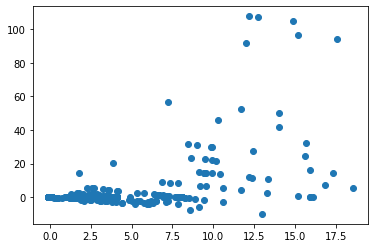

In [10]:
# answer below:
svr = SVR(C=10, kernel='rbf')
model = svr.fit(X_train_scaled, y_train)

svr_train_score = model.score(X_train_scaled, y_train)
svr_test_score = model.score(X_test_scaled, y_test)
print('Optimal SVR Train Score:', svr_train_score)
print('Optimal SVR Test Score:', svr_test_score)

pred_train = model.predict(X_train_scaled)
residuals = y_train - pred_train
plt.scatter(pred_train, residuals)
plt.show()


Looks similar to the heteroscadicity plot we made for the KNN regression, which makes sense as rbf can behave like KNN 